In [2]:
%pylab inline
import numpy as np
import pandas as pd
import os
import sys
sys.path.insert(0, '/home/jfm343/Documents/Delafossites/integration_delafossite/Modular')
import Dispersion
import Lattice
from scipy import linalg as la
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [3]:
# pathMAC="/Users/jfmv/Documents/Proyectos/Moire-Phonon_QMC/BM_bandstructure"
pathchow='/home/jfm343/Documents/Delafossites/integration_delafossite'
# pathpc='/home/juan/Documents/Projects/BM_bandstructure'
pathy=pathchow

In [4]:
path=pathy+'/data/tempsweep_radial__2022-04-28-00-47-50'
path=pathy+'/data/tempsweep_radial__2022-04-30-16-05-32'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))
def getdatadir(fulpath):
    data=[]
    for pa in fulpath:
        if ('data' in pa): data.append(pa)
    return data
frames=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2)
    fullpath=fulpath+'/'+data[0]
    print("reading data ",fullpath)
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)
    
df=pd.concat(frames).sort_values(['theta', 'nu'])


reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-04-30-16-05-32/tempsweep_radial__6/data2022-04-30-09-50-45.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-04-30-16-05-32/tempsweep_radial__5/data2022-04-30-08-02-38.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-04-30-16-05-32/tempsweep_radial__9/data2022-04-30-14-47-39.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-04-30-16-05-32/tempsweep_radial__8/data2022-04-30-13-19-19.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-04-30-16-05-32/tempsweep_radial__2/data2022-04-30-02-50-07.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-04-30-16-05-32/tempsweep_radial__10/data2022-04-30-16-05-31.h5
reading data  /

In [5]:
df

,theta,freq,SE,error,KFX,KFY,T,nu,intP,FS_point,dispname,t1,t2,SFname,J
0,-2.617994,0.000,4.613605,0.049127,-2.401912,-1.393986,6.0,0.5,1000,611,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_-150.0,10.34
1,-2.617994,2.068,4.604576,0.024235,-2.401912,-1.393986,6.0,0.5,1000,611,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_-150.0,10.34
2,-2.617994,4.136,4.611469,0.017499,-2.401912,-1.393986,6.0,0.5,1000,611,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_-150.0,10.34
3,-2.617994,6.204,4.614448,0.015054,-2.401912,-1.393986,6.0,0.5,1000,611,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_-150.0,10.34
4,-2.617994,8.272,4.612494,0.007248,-2.401912,-1.393986,6.0,0.5,1000,611,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_-150.0,10.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-2.094395,196.460,6.309921,0.000100,-1.284702,-2.249687,1.0,0.5,1000,611,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_-120.0,10.34
96,-2.094395,198.528,6.315552,0.000098,-1.284702,-2.249687,1.0,0.5,1000,611,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_-120.0,10.34
97,-2.094395,200.596,6.320502,0.000095,-1.284702,-2.249687,1.0,0.5,1000,611,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_-120.0,10.34
98,-2.094395,202.664,6.324602,0.000092,-1.284702,-2.249687,1.0,0.5,1000,611,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_-120.0,10.34


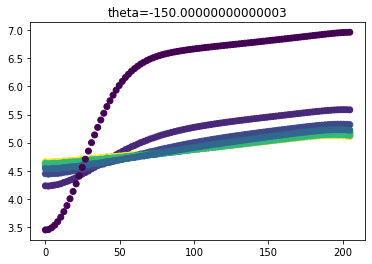

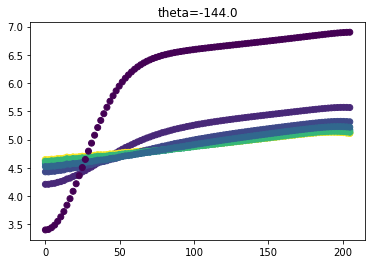

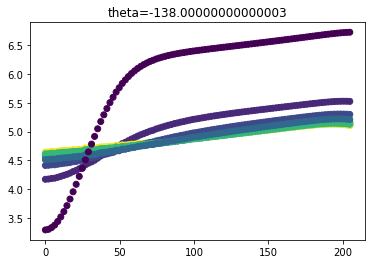

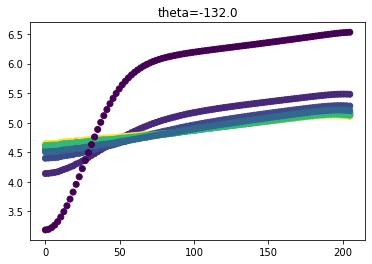

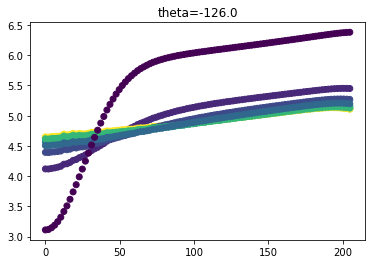

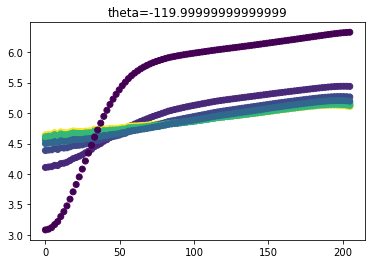

[ 6.  5.  9.  8.  2. 10.  3.  7.  4.  1.]


In [6]:
# thets=df['theta'].unique()
# tss=df['T'].unique()

# for th in thets:
#     df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
#     ax2 = df2.plot( x='freq',y='SE', c='T',colormap='viridis', sharex=True, kind='scatter')
#     plt.title('theta='+str(th*180/np.pi))
    
# print(tss)

thets=df['theta'].unique()
tss=df['T'].unique()

for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
    plt.scatter(df2['freq'],df2['SE'], c=df2['T'] )
    plt.title('theta='+str(th*180/np.pi))
    plt.show()
    
print(tss)

[-2.61799388 -2.51327412 -2.40855437 -2.30383461 -2.19911486 -2.0943951 ]
0 0 0
1 1 1
2 0 2
3 1 0
4 0 1
5 1 2


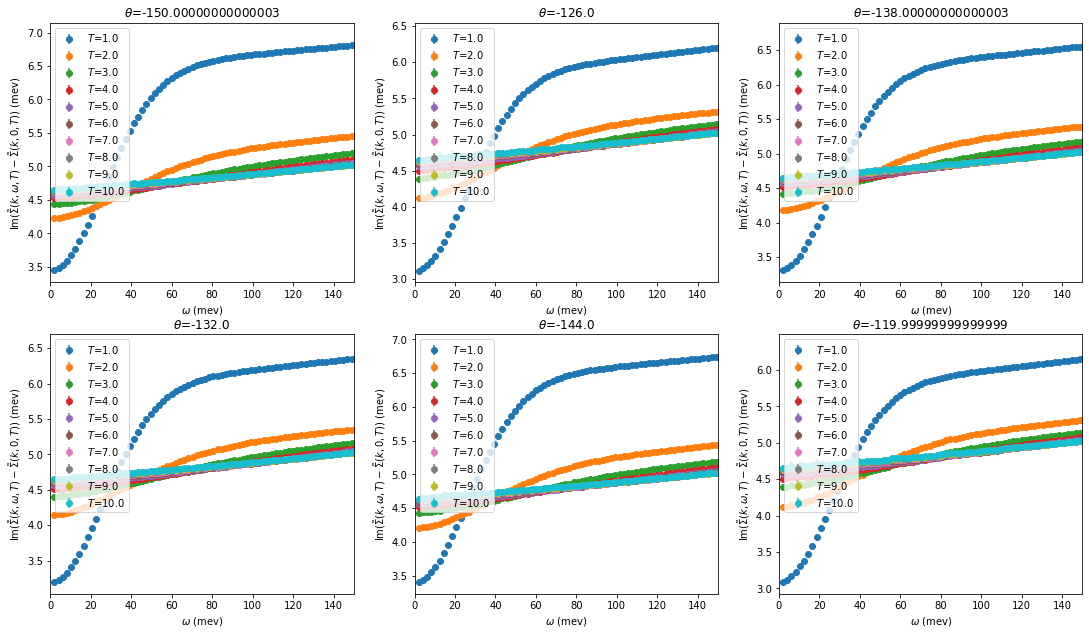

In [10]:
N,M=2,3
figure, axis = plt.subplots(N,M)
figure.set_size_inches(18.5, 10.5)
thets=df['theta'].unique()
print(thets)
df=df.sort_values(by=[ 'freq','T','theta'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    for T in [1.0,2.0,3.0,4.0, 5.0,6.0,7.0, 8.0,9.0,10.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=df3['freq']
        y=df3['SE']#-df3.iloc[1]['SE']
            
        err=df3['error']
        axis[i,j].errorbar(x[1:],(y[1:]),yerr=err[1:] ,   label=r'$T$='+str(T), fmt='o')
        # axis[i,j].scatter(x[1:],(y[1:]) ,   label=r'$T$='+str(T),s=3)
        axis[i,j].set_xlim([0,150])
        # print(df3.iloc[0]['SE'])
        
    axis[i,j].set_title(r'$\theta$='+str(th*180/np.pi))
    axis[i,j].set_ylabel(r"Im($\tilde{\Sigma}(k,\omega, T)-\tilde{\Sigma}(k,0, T)$) (mev)")
    axis[i,j].set_xlabel(r"$\omega$ (mev)")
    axis[i,j].legend()
plt.show()
    # ax2 = df2.plot( x='freq',y='SE', c='nu',colormap='viridis', sharex=True, kind='scatter')

-144.0
0 0 0


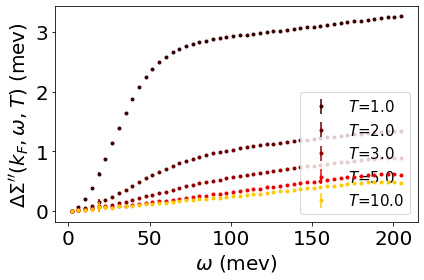

In [9]:
N,M=1,1
figure, axis = plt.subplots(N,M)
# figure.set_size_inches(18.5, 10.5)
thets=[df['theta'].unique()[4]]
print(df['theta'].unique()[1]*180/np.pi)
df=df.sort_values(by=['freq','T'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    a=[]
    for T in [1.0,2.0,3.0,5.0,10.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=df3['freq']
        y=df3['SE']-df3.iloc[1]['SE']
        
            
        err=df3['error']
        axis.errorbar(x[1::2],(y[1::2]),yerr=err[1::2] ,   label=r'$T$='+str(T), fmt='.', color=cm.hot(T/15), zorder=T)
        # print(df3.iloc[0]['SE'])
        a.append(df3.iloc[0]['SE'])
    
    
    # axis.set_title(r'$\theta$='+str(th*180/np.pi))
    # axis.set_ylabel(r"$\tilde{\Sigma}''(k,\omega, T)-\tilde{\Sigma}(k,0, T)$", size=20)
    axis.set_ylabel(r"$\Delta \Sigma''(k_F,\omega, T)$ (mev)", size=20)
    axis.set_xlabel(r"$\omega$ (mev)", size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    pyplot.locator_params(axis='y', nbins=5)
    pyplot.locator_params(axis='x', nbins=7)
    axis.legend(prop={'size': 15}, loc=4)
    plt.tight_layout()
plt.savefig("imgs/fig1b")

[-2.199114857512855]
0 0 0


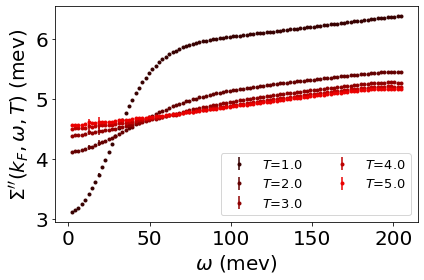

In [42]:
N,M=1,1
figure, axis = plt.subplots(N,M)
# figure.set_size_inches(18.5, 10.5)
thets=[df['theta'].unique()[4]]
print(thets)
df=df.sort_values(by=['freq','T'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    a=[]
    for T in [1.0,2.0,3.0, 4.0 ,5.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=df3['freq']
        y=df3['SE']#-df3.iloc[1]['SE']
        
            
        err=df3['error']
        axis.errorbar(x[1:],(y[1:]),yerr=err[1:] ,   label=r'$T$='+str(T), fmt='.', color=cm.hot(T/15))
        # print(df3.iloc[0]['SE'])
        a.append(df3.iloc[0]['SE'])
    
    
    # axis.set_title(r'$\theta$='+str(th*180/np.pi))
    # axis.set_ylabel(r"$\tilde{\Sigma}''(k,\omega, T)-\tilde{\Sigma}(k,0, T)$", size=20)
    axis.set_ylabel(r"$\Sigma''(k_F,\omega, T)$ (mev)", size=20)
    axis.set_xlabel(r"$\omega$ (mev)", size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    pyplot.locator_params(axis='y', nbins=5)
    pyplot.locator_params(axis='x', nbins=7)
    axis.legend(prop={'size': 13}, loc=4, ncol=2)
    plt.tight_layout()
plt.savefig("imgs/fig2c")

[-2.61799388 -2.51327412 -2.40855437 -2.30383461 -2.19911486 -2.0943951 ]


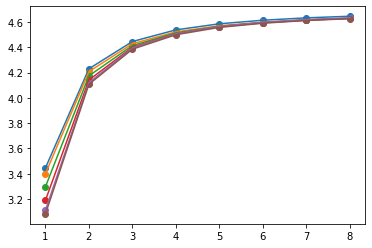

In [43]:

thets=df['theta'].unique()
print(thets)
df=df.sort_values(by=[ 'freq','T','theta'])
for l,th in enumerate(thets):
    df2=df.loc[(df['freq'] ==0 )&(df['theta'] ==th )]
    plt.plot(df2['T'],df2['SE'])
    plt.scatter(df2['T'],df2['SE'])
    
plt.show()
    # ax2 = df2.plot( x='freq',y='SE', c='nu',colormap='viridis', sharex=True, kind='scatter')